In [2]:
import pandas as pd
import numpy as np

In [3]:
u_train_file_path = './files/csv/u_train_embeddings.csv'
v_train_file_path = './files/csv/v_train_embeddings.csv'

U_train_df = pd.read_csv(u_train_file_path, index_col='Unnamed: 0')
V_train_df = pd.read_csv(v_train_file_path, index_col='Unnamed: 0')

In [20]:
V_train_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
3037230,-14.165509,-0.748786,0.602747,-0.921968,1.121789,14.144027,24.489409,-24.616436,24.135412,-15.293215,...,105.664607,-169.569845,93.525582,140.653526,-347.015148,182.502755,268.942335,233.952995,-189.454998,840.478502
3044020,17.023078,49.054706,-38.485012,36.072490,-27.414729,-21.747918,-80.881474,53.805127,-18.451465,25.642847,...,181.075083,417.131480,-568.714489,-111.067533,430.979584,-742.100660,-898.123655,-290.172981,161.991091,1222.167423
3057622,-1.059651,31.262240,-31.422831,26.354349,-16.885995,-8.969736,-16.420561,-7.550968,-36.661938,-20.539597,...,384.498878,-217.415071,-30.884889,-406.856701,369.934960,-41.420957,265.586003,43.632484,427.134104,993.508714
3073151,-2.412565,-26.257539,-3.239051,8.524549,-42.977695,-42.441406,27.583178,20.636156,-15.671905,-37.345903,...,-207.459546,352.122861,-204.835515,-497.774283,73.726064,48.325458,-224.429765,-49.599138,-75.313825,1409.330115
3193383,-14.250262,-10.717555,-47.527705,-29.462356,-28.254184,-26.825583,-29.764051,18.396443,7.085063,44.650131,...,-145.033421,-181.372170,150.223453,-320.452052,-302.699467,-167.182832,487.571723,-912.368381,-1199.000433,1079.936926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803492,64.899188,48.895421,1.952518,-1.023187,48.404068,50.813010,48.388247,-24.934079,33.683314,-15.608656,...,436.031604,-512.886385,36.481816,274.016599,-144.862114,5.948568,-885.759439,1240.618102,-290.454078,683.853405
9803505,-14.640866,-28.966362,-17.610535,38.104268,-61.344880,17.766670,-67.004668,17.280626,16.703333,-30.303026,...,262.950097,-579.100934,-330.602566,-183.095192,135.585276,14.260480,1262.407571,-261.067904,229.169212,917.287408
9803525,-24.811399,-17.729807,22.827095,19.815435,5.854038,36.384135,53.356508,50.191094,-49.056919,16.063301,...,114.951927,29.189723,-95.228946,-72.249117,369.734132,478.508845,-691.341174,172.299519,-126.653885,1460.270983
9803560,43.571085,-13.659468,-15.005144,61.810310,20.198527,-47.479038,2.592808,-24.890924,26.802861,15.842429,...,642.308497,97.862024,-308.875727,65.363724,-35.142667,-333.671918,-64.235619,774.477347,-292.928442,552.880479


## Recommendation Process
##### To generate recommendations for a specific user, follow these steps:

#### a) Retrieve User's Recommendations
##### Select User: Choose the target user for whom you want to generate recommendations.
#### b) Extract User's Interaction Scores
##### User's Row in X: Retrieve the row corresponding to the selected user from the matrix X. Let's denote this row as X_user.
#### c) Rank Items by Interaction Scores
##### Sort Interaction Scores: Sort the values in the X_user row in descending order. Each value represents the interaction score between the user (selected) and a specific item.
#### d) Recommend Top-N Items
##### Top-N Recommendations: Select the top-N items with the highest interaction scores from the sorted X_user row. These items are recommended to the user based on their predicted preferences.

## Load Validation Data

In [4]:
# Raw validation data
size = 'demo'
type_ = 'validation'
behaviors_validation_path = f'./files/parquet/ebnerd_{size}/{type_}/behaviors.parquet'
history_validation_path = f'./files/parquet/ebnerd_{size}/{type_}/history.parquet'
df_behaviors_val = pd.read_parquet(behaviors_validation_path)
df_history_val = pd.read_parquet(history_validation_path)

In [5]:
# Initialize an empty dictionary to store recommendation scores for each user
recommendation_scores = {}

# Iterate over each user in the validation dataset
for user_id in df_history_val['user_id'].unique():
    try:
        # Retrieve user embedding for the current user
        user_embedding = U_train_df.loc[user_id,:] # Assuming user_id corresponds to row index in U_train

        # Compute recommendation scores for all articles using dot product with item embeddings
        scores = np.dot(V_train_df, user_embedding)

        # Sort items based on scores in descending order
        sorted_indices = np.argsort(scores)[::-1]  # Sort indices in descending order
        sorted_items = [item_id for item_id in sorted_indices]  # Convert indices to item IDs

        # Store sorted recommended item IDs for the user in recommendation_scores dictionary
        recommendation_scores[user_id] = sorted_items
    except:
        # Store np.nan value for the user_id that was not present in the train embeddings
        recommendation_scores[user_id] = np.nan

In [6]:
# recommendation_scores = {}
# # Retrieve user embedding for the current user
# user_embedding = U_train_df.loc[22779,:]  # Assuming user_id corresponds to row index in U_train

# # Compute recommendation scores for all items using dot product with item embeddings
# scores = np.dot(V_train_df, user_embedding)

# # Sort items based on scores in descending order
# sorted_indices = np.argsort(scores)[::-1]  # Sort indices in descending order
# sorted_items = [item_id for item_id in sorted_indices]  # Convert indices to item IDs

# # Store sorted recommended item IDs for the user in recommendation_scores dictionary
# recommendation_scores[user_id] = sorted_items

In [7]:
top_n_recommendations = {}
top_n = 10  # Number of top recommendations to generate

for user_id, recommended_items in recommendation_scores.items():
    if isinstance(recommended_items, list):  # Check if recommended_items is a list
        top_n_recommendations[user_id] = recommended_items[:top_n]
    else:
        top_n_recommendations[user_id] = np.nan

#### If a user_id from the validation set does not exist in the U_train matrix (user embeddings obtained from matrix factorization), it means that the user was not present in the training data used for matrix factorization. In this case, you have several options to handle such scenarios:

#### Fallback Strategy:
##### Use a fallback strategy such as recommending popular or trending items to users not present in U_train.
##### For example, you can recommend the most popular items across all users or based on recent trends if a user is new and their preferences are unknown.
#### User Cold Start Handling:
##### Implement a specific handling mechanism for new or cold-start users (users with no historical interactions in the training data).
##### For cold-start users, consider hybrid recommendation approaches or content-based recommendation methods using user profile information (if available).
#### Default Recommendations:
##### Provide default recommendations or a diverse set of items to users without historical data.
##### This can help engage users initially and gather feedback to improve personalized recommendations over time.
#### Skip Recommendation:
##### Skip generating recommendations for users not present in U_train if they represent a small proportion of the validation dataset.
##### Log or handle these cases separately for further analysis or improvement in the recommendation system.

In [62]:
top_n_recommendations[750497]

[5867, 9824, 8933, 5989, 4421, 5091, 10568, 9622, 9638, 3593]

## Creation of Metrics

In [19]:
9622 in list(df_history_val[df_history_val['user_id'] == df_history_val['user_id'][1]]['article_id_fixed'].values[0])

False

In [93]:
df_history_val['user_id'][0]

750497

In [18]:
list(df_history_val[df_history_val['user_id'] == df_history_val['user_id'][1]]['article_id_fixed'].values[0])

[9749025,
 9750090,
 9750015,
 9750161,
 9745750,
 9747554,
 9750533,
 9749277,
 9750389,
 9751115,
 9751115,
 9751064,
 9750971,
 9747441,
 9751115,
 9751300,
 9749154,
 9750959,
 9751220,
 9751211,
 9751385,
 9751349,
 9751202,
 9751531,
 9747369,
 9751670,
 9751531,
 9751531,
 9751897,
 9751921,
 9751895,
 9725978,
 9751895,
 9752243,
 9752312,
 9752342,
 9749469,
 9752656,
 9752479,
 9752824,
 9752375,
 9752788,
 9753153,
 9752867,
 9753295,
 9752962,
 9753521,
 9752591,
 9753545,
 9753503,
 9753543,
 9753526,
 9753741,
 9754413,
 9754271,
 9754520,
 9754484,
 9754520,
 9754413,
 9754520,
 9753985,
 9754786,
 9753985,
 9754288,
 9754814,
 9754882,
 9755552,
 9755571,
 9749849,
 9755696,
 9754025,
 9755614,
 9755181,
 9755690,
 9755690,
 9755010,
 9755932,
 9755964,
 9755742,
 9755756,
 9756295,
 9756107,
 9756583,
 9756317,
 9756425,
 9756425,
 9757183,
 9757174,
 9756397,
 9756733,
 9756941,
 9757717,
 9757676,
 9757746,
 9757698,
 9756883,
 9757607,
 9757857,
 9757607,
 9757426,


In [94]:
top_n_recommendations[750497]


[5867, 9824, 8933, 5989, 4421, 5091, 10568, 9622, 9638, 3593]

In [10]:
user_article_recommendations_probabilities = {}
for user_id in list(df_history_val['user_id']):
    try:
        user_val_articles = list(df_history_val[df_history_val['user_id'] == user_id]['article_id_fixed'].values[0])

        top_10_recomendation_articles = top_n_recommendations[user_id]

        counter = 0 

        for article in top_10_recomendation_articles:
            if article in user_val_articles:
                counter +=1 
        user_article_recommendations_probabilities[user_id] = counter / len(top_10_recomendation_articles)
    except:
        user_article_recommendations_probabilities[user_id] = np.nan


In [16]:
for key, value in user_article_recommendations_probabilities.items():
    if value != 0 and not np.isnan(value):
        print(key, value)

AUC score: 1.00


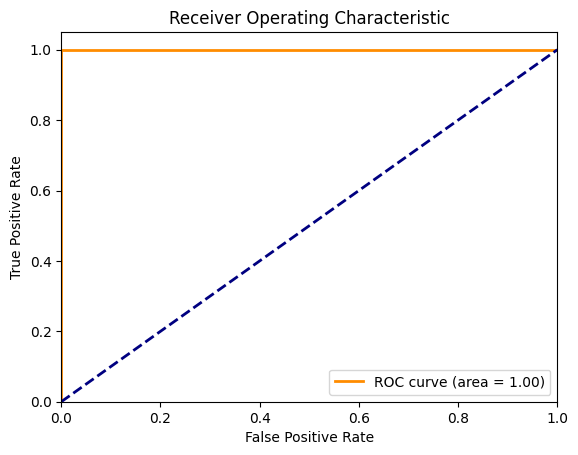

In [59]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sample lists (replace with your actual data)
recommendations = top_n_recommendations
validation = list(df_history_val[df_history_val['user_id'] == 750497]['article_id_fixed'][0])

# Function to get embedding score for an ID (replace with your actual implementation)
def get_embedding_score(id, V_train_df):
    embed = V_train_df.loc[id, :]
    return embed

# Generate binary labels for validation set
labels = np.array([1 if id in recommendations else 0 for id in validation])

# Generate scores for validation set using embeddings
scores = np.array([get_embedding_score(id) for id in validation])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(labels, scores)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f'AUC score: {roc_auc:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

